# 데이터 전처리 (Data Processing) 

- 데이터 분석에 적합하게 데이터를 가공하는 작업  




### 데이터 전처리 종류 

- 데이터 클리닝 - 결측치 처리, 잘못된 값 처리
- 스케일링 - 변수들의 값의 범위를 동일하게 맞추는 것: 표준 스케일링, min-max 스케일링
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등

## 데이터 클리닝

###  결측치 및 잘못된 값 처리
- 값이 비어 있는 것을 처리하는 것 (파이썬에서는 빈 값이 nan으로 표시 : not a number)
- 결측치 처리 방법 세 가지
  - 삭제 :결측치가 포함된 샘플(행) 삭제 : dropna()  
  - 대체 : 결측치를 적절한 값으로 대체 : fillna()  
  - 그대로 둠 : 다음 분석 단계로 넘겨서 처리 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [109]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import seaborn as sns

## 실습 데이터
- 키와 몸무게 데이터 생성
- 평균 170cm, 65kg, 표준편차 4cm, 5kg

In [4]:
n_samples = 1000
np.random.seed(3)
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 5*np.random.randn(n_samples).round(2) + 65
df_raw = pd.DataFrame({"height": height, "weight": weight})
df_raw[:5]

,height,weight
0,177.16,65.15
1,171.76,70.65
2,170.40,52.20
3,162.56,63.65
4,168.88,55.45


## 결측치 처리 

- 결측치 확인은 df.isnull() / isna() 사용
- 결측치 치환은 df.fillna() 사용
- 결측치 삭제 : df.dropna() / df.fropna(subset='열')

In [29]:
# 결측치를 바로 이전 값/다음 값으로 대체 : forward fill / backward fill
# method='ffill' / 'bfill' : deprecated
# df.ffill() / df.bfill()


## 스케일링 
- 데이터의 값의 범위를 조정하는것  
- 표준 스케일링 : 표준화
  - 각 칼럼의 평균을 0, 분산이 1이 되도록 스케일링 
  - 데이터의  분포 형태는 그대로 유지하면서 평균을 0, 표준편차를 1로 환산하는 것일 뿐  
  - 평균과 표준편차를 구하고, 모든 데이터마다 평균을 빼서 표준편차로 나누는 연산
- Min-max 스케일링
  - 데이터가 0과 1 사이에 위치하도록 스케일링 
  - 최소값 0, 최대값 1이 됨
  - 데이터의 최소값과 최대값을 알고 있을 때 사용  

일반적으로 연속형 수치는 스케일링 작업 수행
- 숫자가 상대적이기 때문에 스케일링을 해서 문제가 되지는 않지만  
- 스케일링을 하지 않을 경우 문제 발생 
  - 예 : 변수1은 1000점 만점이고, 변수2는 10점 만점일 경우  
    - 변수2는 결과에 어떤 영향도 미치지 못함  
    - 인공지능 트리 계열의 모델에서는 스케일링을 하지 않아도 되지만,   
    - 선형모델, 신경망 모델 등에서는 스케일링 작업을 수행  

#### 표준 스케일링
- sklearn.preprocessing의 StandardScaler 클래스 사용
- fit_transform() 사용  

In [76]:
df = df_raw.copy()

In [30]:
# 키, 몸무게 데이터를 각각 표준 스케일링 한 후 컬럼 추가


### 스케일링 이전의 원래 값으로 환원하는 방법
- inverse_transform을 사용한다

In [31]:
# 원래 값으로 환원 : inverse_transform()
# 화원 : 스케일링 변환된 값을 스케일링 하기 전의 값으로 되돌리는 것


### 데이터 분포 확인

In [32]:
# 스케일링 하기 전


In [33]:
# 스케일링 후


## Min-Max 스케일링
- 데이터의 최소값이 0, 최대값이 1이 되도록 조정

In [34]:
# min-max 스케일링 된 데이터의 분포 확인


In [35]:
# 이상치가 포함된 키 데이터 생성 : height_2


In [36]:
# 이상치가 포함된 height_2에 표준 스케일링 적용하고 컬럼 추가


In [37]:
# 이상치가 있는 컬럼과 이상치가 없는 컬럼 비교 (표준 스케일링 변환된 값으로 비교)


In [38]:
# 이상치가 있는 데이터에 Min-max 스케일링 적용


In [39]:
# 이상치가 포함되어 있는 값을 Min-max 스케일링 한 후 분포 확인



In [ ]:
# 결과
# 이상치 데이터가 일부 포함되어 있는경우 
# 표준 스케일링 변환할 경우에는 변환전이나 변환후의 데이터 분포에 큰 영향이 없지만
# min-max 스케일링 변환할 경우에는 변환전과 변환 후 데이터 분포에 영향을 미친다

### 이상치 처리  
- 이상치 확인 목적
  1. 이상치를 제거하여 데이터 분석의 정확도를 높이는 것
  2. 이상치를 찾는 것  (outlier detection)
     - 신용카드 사용 데이터 분석 시 특이한 구매를 찾는 경우
     - 주문 내역 데이터 분석 시 구매 금액이 월등히 높은 경우  
     - 기기 등 작동 데이터 분석 시 이상을 찾는 경우 

In [ ]:
# 이상치 처리 방법
# (1) 로그 변환을 수행하여 수치를 줄여서 정상 데이터 범주에 포함시키는 방법
# (2) 이상치 제거 방법

In [40]:
# 스케일링 하기 전의 몸무게와 키 값으로 boxplot() 그리고 이상치 확인
# 이상치가 없는 경우와 있는 경우의 box plot 확인


In [41]:
# 스케일링 한 후의 몸무게와 키 값으로 boxplot() 그리고 이상치 확인


In [43]:
# 이상치 위치 확인


In [116]:
# 이상치 제거

In [44]:
# 이상치 제거 후 데이터 크기 확인



### 로그 변환 및 환원
- 정규 분포가 아닌 결과값을 정규 분포 형태로 변환  
- 왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법이 로그 변환    
- log1p() 이용해 로그 변환한 결과값을 기반으로 학습한 후  
- 예측 시 다시 결과값을 expm1()으로 환원해서 사용  
  

#### 로그 변환을 하는 이유
- 정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함
- 큰 수를 작게 만들고, 복잡한 계산을 쉽게 만들고, 
- 데이터의 왜곡도를 줄여서 데이터 분석 시 의미있는 결과를 도출하기 위함

### log1p() : log() + 1   
- log(진수)
    - 진수는 양수만 가능  
    - 0에 가까운 아주 작은 양수의 경우(0.0000000..) -inf가 나옴  
    - 이런 문제를 방지하기 위해 1을 더해서 0보다 큰 양수의 값을 취함  
    - Numpy에서는 log1p()로 지원  

In [45]:
# 로그 변환 예


In [46]:
# (2) log1p() : log() + 1


In [106]:
x = [1, 2, 3, 4, 10, 20, 30, 40]
y = [2, 3, 4, 5, 4, 7, 8, 9]
test = pd.DataFrame([x, y])
test

,0,1,2,3,4,5,6,7
0,1,2,3,4,10,20,30,40
1,2,3,4,5,4,7,8,9


In [47]:
from scipy import stats


### 카테고리 값의 인코딩 

### 카테고리 값의 문자열 변환
- 머신러닝/딥러닝 알고리즘에서는 문자열 값을 입력 값으로 허용하지 않음
- 인코딩 처리하여 숫자형으로 변환


### 머신러닝의 대표적인 인코딩 방식
- 레이블 인코딩 (Label Encoding)
- 원-핫 인코딩 (One-Hot-Encoding)


### 레이블 인코딩 (Label Encoding)
- items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']  
- encoder = LabelEncoder()  
- encoder.fit(items)  
- labels = encoder.transform(items)  
- 인코딩 변환값 :  [0 1 4 5 3 3 2 2]  

--- 
레이블 인코딩 방식 주의
- 간단하게 문자열 값을 숫자형 값으로 변환하지만  
- 이는 단순 코드일 뿐 크기와는 상관 없음  
- 일부 ML 알고리즘에서 이를 적용할 경우 예측 성능이 떨어지는 경우 발생  
- 숫자 값의 크기 특성이 작용하기 때문  
- 즉, 냉장고가 1 믹서가 2로 변환되면 1보다 2가 더 큰 값이므로 가중치가 부여되거나  
- 더 중요하게 인식될 가능성 발생  
- 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에서는 적용하지 않음  
- 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩 적용 시 문제 없음  

### 원-핫 인코딩 변환  
- 행 형태의 피처 값을 열 형태로 변화한 뒤    
- 피처 값 인덱스에 해당하는 칼럼에는 1로 표시하고   
- 나머지 칼럼에는 0으로 표시하는 방식    

원-핫 인코딩 변환 방식   
- 방법1 : 사이킷런의 원-핫 인코딩 : OneHotEncoder 클래스로 쉽게 변환  
    - LabelEncode()로 숫자 변환 후 OneHotEncoder() 수행 
- 방법2 : 판다스의 get_dummies()를 이용해서 원-핫 인코딩 수행 
    - pd.get_dummies()는 자동으로 object형만 원-핫 인코딩 수행  


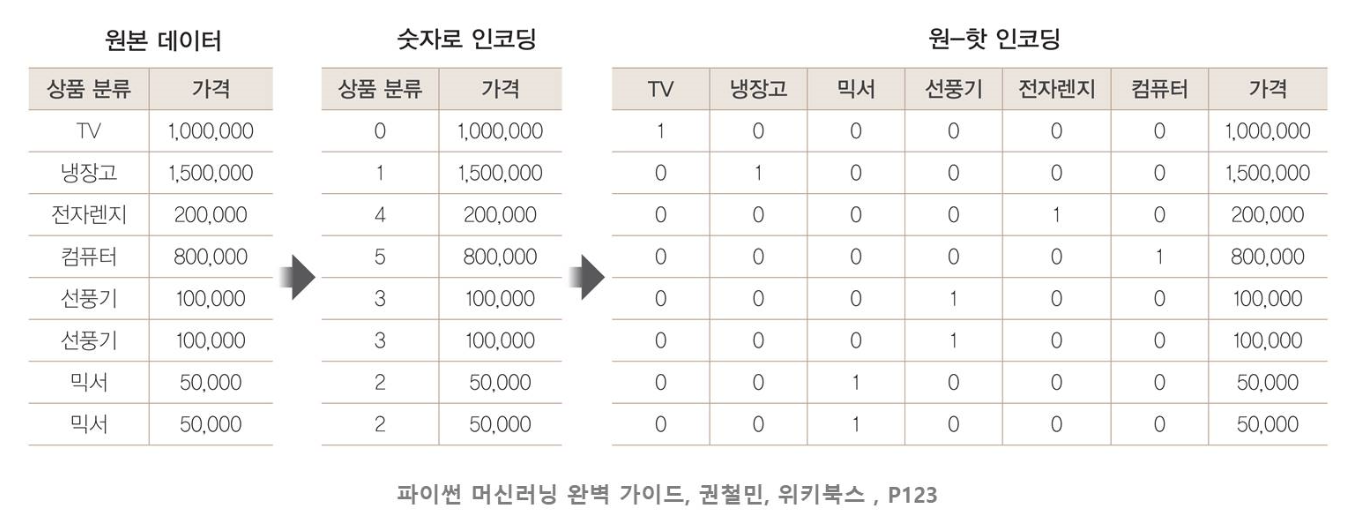

In [48]:
# 방법1 : 사이킷런의 원-핫 인코딩 : OneHotEncoder 클래스로 쉽게 변환  

# 원-핫 인코딩 전체 과정


items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# (1) 먼저 숫자값으로 변환하기 위해 LabelEncoder 사용


In [49]:
# (2) 입력 값을 2차원 데이터로 변환


In [50]:
# (3) OneHotEncoder 클래스로 원-핫 인코딩 적용


In [51]:
# 방법2 : 판다스의 get_dummies()를 이용해서 원-핫 인코딩 수행  


In [52]:
# 판다스의 get_dummies() 이용해서 원-핫 인코딩 수행


In [ ]:
# 원-핫 인코딩 연습문제
# 키 값을 카테고리 값으로 변환 후 원-핫 인코딩 수행 연습

In [136]:
n_samples = 1000
np.random.seed(5)
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 5*np.random.randn(n_samples).round(2) + 65
df_raw = pd.DataFrame({"height": height, "weight": weight})
df_raw[:5]

,height,weight
0,171.76,67.7
1,168.68,67.0
2,179.72,68.6
3,169.00,64.9
4,170.44,65.1


In [137]:
df = df_raw.copy()

In [138]:
# (1) 키 값을 등급으로 구분 : 카테고리 값으로 변환
# 174 이상 : tall
# 160 이상 174 미만  : standard
# 160 미만 : small
# df_raw['tall'] 컬럼 추가 

In [53]:
# (2) 카테고리 데이터의 구성비 확인


In [54]:
# (3) 원-핫 인코딩 수행


In [55]:
# (4) 원래 데이터 + tall 컬럼 +  원-핫 인코딩된 컬럼 추가 
